In [1]:
#!/usr/bin/env python

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon
from numpy import exp as ē
from numpy import sum as Σ
from numpy import array
from numpy import log as ln
from numpy import genfromtxt
from numpy import mean

In [3]:
X = genfromtxt('time_until_phone_drop.csv', delimiter=',')
n = X.shape[0]
μ = mean(X)

In [4]:
def ln_p(θ): # the log likelihood of joint
	return n*ln(θ) - θ*Σ(X)

In [5]:
def ᐁln_p(θ): # derivative of the log likelihood 
	return (n/θ - Σ(X))

In [6]:
θ = 2
η = 0.0001

In [7]:
for i in range(100):
	θ = θ + η*ᐁln_p(θ)

In [8]:
print('Using the mean method, the best θ = 1/μ = %.3f'%(1/μ))
print('Using Maximum Likelihood, the best θ = %.3f'%θ)
print('Probability of drop phone within 2 years %.3f'%expon.cdf(2, 0, μ))
print('Time until 90 percent of the population dropped their phone %.3f'%expon.ppf(0.9, 0, μ))

Using the mean method, the best θ = 1/μ = 1.118
Using Maximum Likelihood, the best θ = 1.119
Probability of drop phone within 2 years 0.893
Time until 90 percent of the population dropped their phone 2.059


draw the histogram and the line

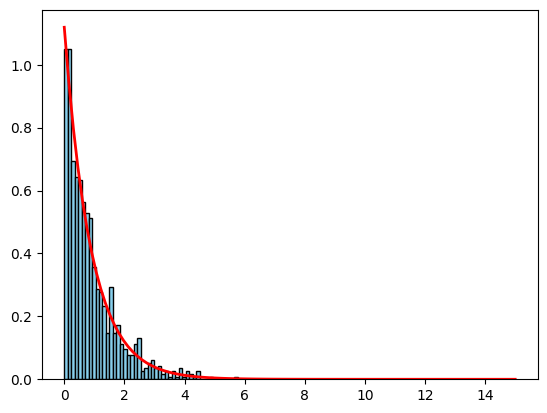

In [9]:
plt.hist(X, bins=50, density=True, color='skyblue', edgecolor='black')
x = np.linspace(0,15, 100)
y = θ*ē(-θ*x)
plt.plot(x, y, color='red', linewidth=2)
plt.show()